In [5]:
#pip install -U scikit-learn scipy matplotlib

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,Flatten,Reshape
from tensorflow.keras.models import Model
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import pickle as p
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix 

In [7]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [8]:

#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Downloads/Group_1"


#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)



In [9]:
Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255

In [10]:
#bottleneck dimension
pcaDim=256

In [22]:
xTrain=np.reshape(Input_train_Dataset,(Input_train_Dataset.shape[0],784))
xVal=np.reshape(Input_val_Dataset,(Input_val_Dataset.shape[0],784))
xTest=np.reshape(Input_test_Dataset,(Input_test_Dataset.shape[0],784))

In [13]:
pca=PCA(pcaDim)#based on arch
pcaFit=pca.fit(xTrain)

In [19]:
pcaTrain=pca.transform(xTrain)
trainReconstruct=pca.inverse_transform(pcaTrain).reshape(Input_train_Dataset.shape[0],28,28)

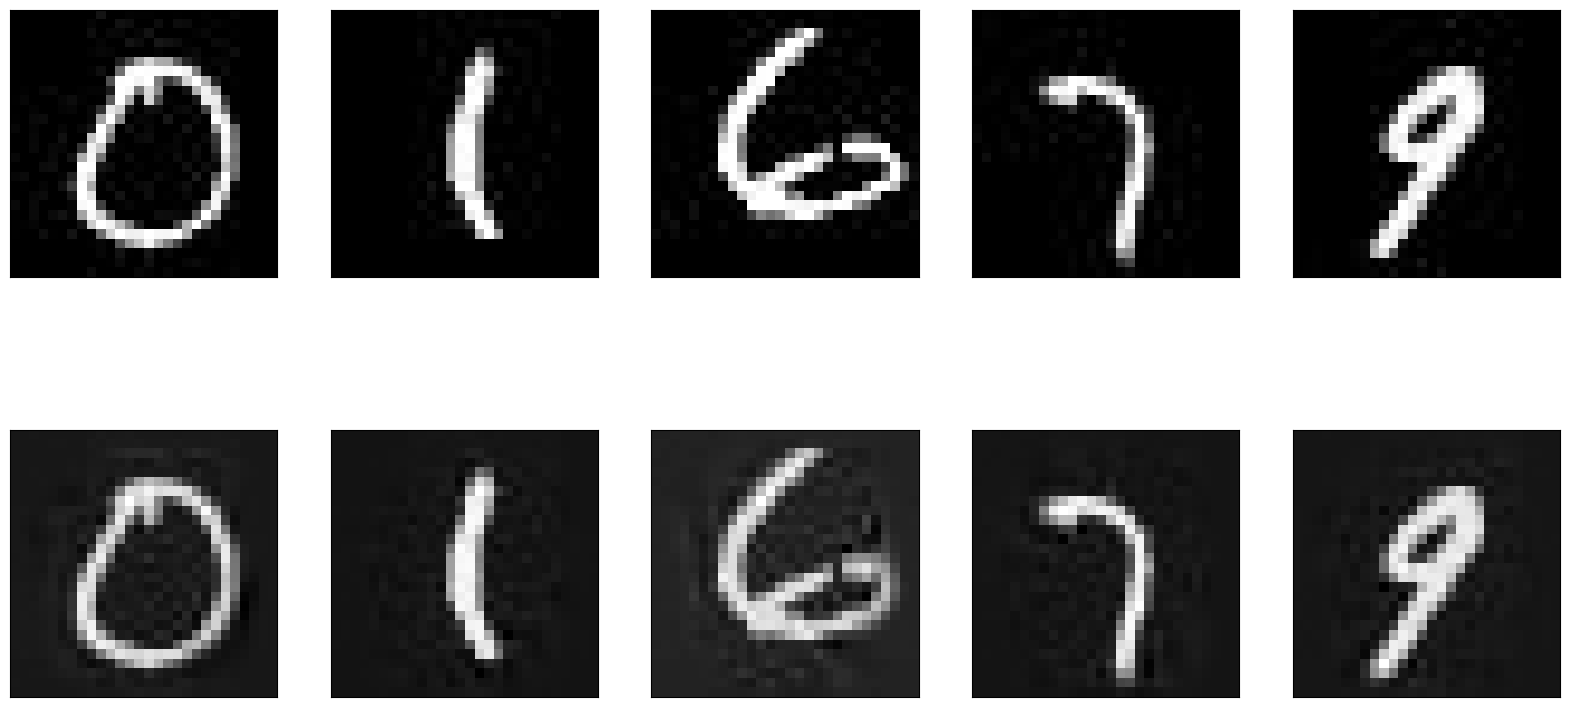

In [20]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [27]:
pcaVal=pca.transform(xVal)
valReconstruct=pca.inverse_transform(pcaVal).reshape(Input_val_Dataset.shape[0],28,28)

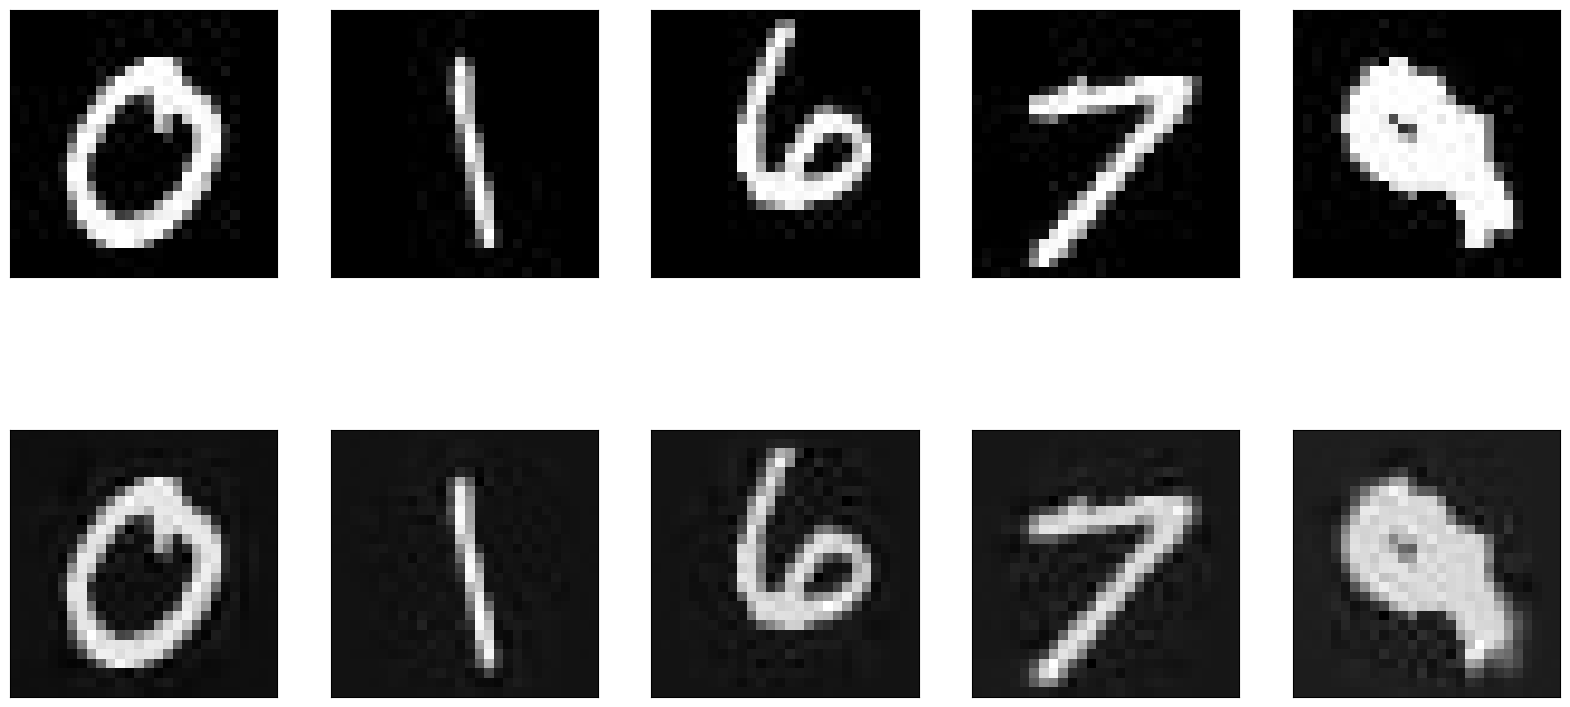

In [28]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_val==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_val_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(valReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [23]:
pcaTest=pca.transform(xTest)
testReconstruct=pca.inverse_transform(pcaTest).reshape(Input_test_Dataset.shape[0],28,28)

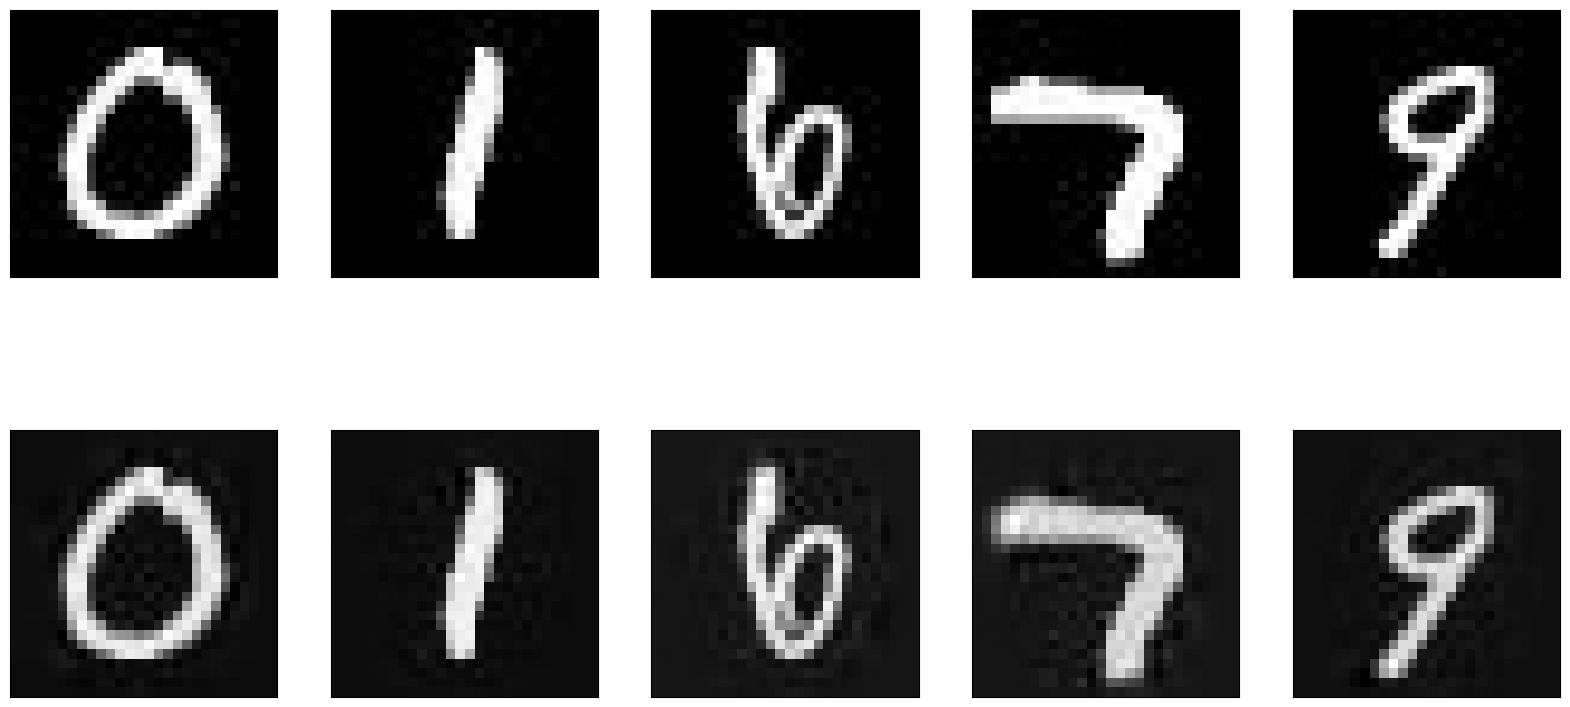

In [26]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_test==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_test_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(testReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [17]:
print(trainReconstruct)

[[[-3.94858694e-04 -8.49992688e-05 -2.59719861e-04 ...  1.52937827e-04
    2.05662128e-04 -2.10832525e-04]
  [ 3.80063888e-04 -7.45421274e-05 -7.56685442e-04 ... -5.07026595e-06
   -1.61721275e-05  3.27820671e-04]
  [-2.19258422e-04  1.88379975e-04  1.50396636e-04 ...  5.78498441e-04
   -9.06215424e-05  1.22205056e-05]
  ...
  [ 1.86511756e-03  1.78917020e-03  4.17718029e-03 ...  1.67931280e-05
   -5.31836853e-05 -3.05861454e-05]
  [ 2.51614361e-03  1.80821714e-03  2.08716826e-03 ... -1.34775908e-04
   -1.80694768e-04  6.70586576e-06]
  [ 1.83027644e-03  2.80698664e-03  3.81097146e-03 ... -1.71820252e-04
   -9.40692406e-06  2.51524469e-05]]

 [[ 3.65213008e-03  4.75931097e-03  4.77853806e-03 ...  1.39223565e-04
    3.67178575e-04  5.34829536e-04]
  [ 6.26108497e-03  2.85775589e-03  3.58128232e-03 ...  6.93099059e-04
    6.65393512e-04  3.82283939e-05]
  [ 5.38466427e-03  4.08482237e-04  2.19344250e-03 ...  8.41959934e-04
    2.46744495e-04  3.61702359e-04]
  ...
  [ 9.30555672e-05  9.3

In [32]:
model = keras.Sequential([
        #layers.Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(1024, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(512, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])

#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=10,verbose=1)

model_fit = model.fit(x = pcaTrain, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(pcaVal,  Output_val), validation_batch_size=1)
model.save('/Users/vds/Downloads/modelAssign4/pca256.h5')
f=open('/Users/vds/Downloads/modelAssign4/Histpca256.pckl','wb')
p.dump(model_fit.history,f)
f.close()

Epoch 1/10000
356/356 [==============================] - 7s 16ms/step - loss: 0.3526 - accuracy: 0.8787 - val_loss: 0.1130 - val_accuracy: 0.9655
Epoch 2/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.1034 - accuracy: 0.9667 - val_loss: 0.0854 - val_accuracy: 0.9705
Epoch 3/10000
356/356 [==============================] - 6s 17ms/step - loss: 0.0858 - accuracy: 0.9724 - val_loss: 0.0968 - val_accuracy: 0.9692
Epoch 4/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.0782 - accuracy: 0.9744 - val_loss: 0.1294 - val_accuracy: 0.9586
Epoch 5/10000
356/356 [==============================] - 6s 16ms/step - loss: 0.0681 - accuracy: 0.9787 - val_loss: 0.1426 - val_accuracy: 0.9544
Epoch 6/10000
356/356 [==============================] - 6s 17ms/step - loss: 0.0627 - accuracy: 0.9801 - val_loss: 0.0822 - val_accuracy: 0.9750
Epoch 7/10000
356/356 [==============================] - 6s 17ms/step - loss: 0.0595 - accuracy: 0.9806 - val_loss: 0.0932 -

Epoch 57/10000
356/356 [==============================] - 7s 19ms/step - loss: 5.4575e-04 - accuracy: 0.9999 - val_loss: 0.1420 - val_accuracy: 0.9781
Epoch 58/10000
356/356 [==============================] - 7s 21ms/step - loss: 5.4555e-04 - accuracy: 0.9999 - val_loss: 0.1405 - val_accuracy: 0.9792
Epoch 59/10000
356/356 [==============================] - 7s 21ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.1428 - val_accuracy: 0.9768
Epoch 60/10000
356/356 [==============================] - 7s 20ms/step - loss: 0.0129 - accuracy: 0.9964 - val_loss: 0.1449 - val_accuracy: 0.9768
Epoch 61/10000
356/356 [==============================] - 7s 21ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.1236 - val_accuracy: 0.9776
Epoch 62/10000
356/356 [==============================] - 7s 20ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.1264 - val_accuracy: 0.9781
Epoch 63/10000
356/356 [==============================] - 7s 21ms/step - loss: 7.5123e-04 - accuracy: 0.9999 -

In [33]:
print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=pcaTrain,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=pcaVal, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=pcaTest, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)




Evaluation of model on train data:
11385/11385 [==============================] - 17s 1ms/step - loss: 3.2472e-06 - accuracy: 1.0000
['loss', 'accuracy']
[3.247179392928956e-06, 1.0]

Evaluation of model on validation data:
3795/3795 [==============================] - 5s 1ms/step - loss: 0.1702 - accuracy: 0.9794
['loss', 'accuracy']
[0.17021475732326508, 0.9794466495513916]

Evaluation of model on test data:
3795/3795 [==============================] - 6s 1ms/step - loss: 0.1895 - accuracy: 0.9781
['loss', 'accuracy']
[0.18953688442707062, 0.9781290888786316]


In [34]:
print('\nPredictions for test data:')
testProb=model.predict(pcaTest, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)
print(pred)
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix=confusion_matrix(Output_test,pred)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix)


Predictions for test data:
3795/3795 [==============================] - 5s 1ms/step
[4 4 4 ... 1 1 1]
[[747   1   5   3   3]
 [  1 753   1   3   1]
 [  8   4 745   0   2]
 [  1   6   2 736  14]
 [  8   5   0  15 731]]
